# MS4S10-Assessment 2
## Mark Baber - 17076749

This report will go over a few algorithms which are great for machine learning, these algorithms are as follows:

1. Gradient Descent
2. Logistic Regression (as a neural network)
3. MNIST

### Task 1 - Gradient Descent (15%)

Apply the gradient descent algorithm to find the minimum of the following function of four variables.
\begin{equation}
f(x,y,z,w) = \frac{1}{4} (2-x)^2 + (3y-5)^4 + e^{2z^{4}+w^2}
\end{equation}

Comment on the Results.

In [1]:
# here are all of the modules used/tested for this cw.
# import modules
import kerastuner
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# import from xyz
from cycler import cycler
from keras import * 
from keras import models
from keras.datasets import mnist, reuters
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from tensorflow import keras
# set matplotlib inline
%matplotlib inline

In [2]:
# check versions
print('kerastuner version:', kerastuner.__version__)
print('numpy version:', np.__version__)
print('tensorflow version:', tf.__version__)

kerastuner version: 1.0.2
numpy version: 1.20.1
tensorflow version: 2.4.1


In [3]:
myState = 17076749

# condition when stop
tolerance = 0.01

# size of the step
step_size = 0.01

# starting point 
# x,y,z,w = 7, 5, 6, 3
x,y,z,w = 34, 43,7, 4


# definition of the function
def fun(x,y,z,w):
    return 1/4*(2-x)**2 + (3*y-5)**4 + np.exp(2*z**4+w**2)
# first partial derivative
def der1(x):
    return 2*1/4*(2-x)*-1
# second partial derivative
def der2(y):
    return 3*(3*y-5)-1
# third partial derivative
def der3(z, w):
    return np.exp(2*z**4+w**2)

# function to carry out the step
def step(z, grad, step_size):
    return (z - step_size * grad)

# counter for number of steps
i = 0
# loop through the functions
while True:
    # start at 0 + 1 each loop
    i += 1
    
    grad_x = der1(x)
    grad_y = der2(y)
    grad_z = der3(z, w)
    
    next_x = step(x, grad_x, step_size)
    next_y = step(y, grad_y, step_size)
    next_z = step(z, grad_z, step_size)
    #next_w = step(w, grad_w, step_size)
    
    if (np.sqrt(
        (x - next_x)**2 + 
        (y - next_y)**2)  < tolerance):
        break # breaks out of the while true loop
                #(z - next_z)**2 + 
                #(w - next_w)**2)
    # update xyz, to next(xyz)
    x, y, z = next_x, next_y, next_z #, next_w
print(i)

555


<ipython-input-3-2b106e3b3ee6>:25: RuntimeWarning: overflow encountered in exp
  return np.exp(2*z**4+w**2)


Gradient Descent is an optimization algorithm which is widely used to optimize a neural network (S.Ruder 2016). Above is an example of using a Gradient descent algorithm to find the minimum of the given function.
<br>
When running the above code with these variables:
- x = 7
- y = 5
- z = 6
- w = 3

It took 184 iterations to find the minimum of the function with the last 2 values being as follows:
- 4.0080323264890785 1.777777890936723 -inf 3 inf
- 3.9979921648566332 1.7777778807524178 -inf 3 inf

Which shows a tiny difference between the two, this could also be due to the step size being small also with a value of 0.01. Whilst this could become more accurate, it is important to find an accurate and well performed algorithm for the task.

If the values were to change for a few of these variables;
- x = 34
- y = 43
- z = 7
- w = 4

Here we can see it took only 555 iterations of i to get the minimum of the function, with a bigger step size and tolerance. This has improved performance but has lowered the accuracy.

<br> Whilst this algorithm looks to be working, there could have been a few errors made on my part, specifically the break point around the tolerance for the next z & w. As the value of w relies on the value of z, these two can't really be split into multiple step (next_z/w). 

### Task 2 – Logistic Regression as a Neural Network with another activation function (45%)

Write a report on how to consider Logistic Regression as a Neural Network with one single neuronusing as the activation function.

\begin{align}
tanh z = \frac{{e^z-e^{-z}}}{{e^z+e^{-z}}}
\end{align}

<br>
Observe that the range of the hyperbolic tangent is the interval (−1 : 1). You will need to rescale the activation function and/or the cross-entropy loss functions required. Focus in particular on:

1. The calculation of the derivative of the activation function and how to express the derivative using the hyperbolic tangent itself.

2. Discuss the behaviour of the cross-entropy loss function. Use matplotlib to draw appropriate graphs and comment on the results.

3. And Evaluate 
\begin{align}
\frac {\delta L^{i}}{\delta wk} \text{ and} \frac {\delta L^{i}}{\delta b }
\end{align}


#### 2.0 - Initial setup
To start with creating a logistic regression as a neural network, lets begin by importing the modules which would be required along with some Gaussian blobs for clustering.

The next step would be to set up the dataset as a test train split, this could either be done with a module from scikit learn, or it can also be done manually like so.

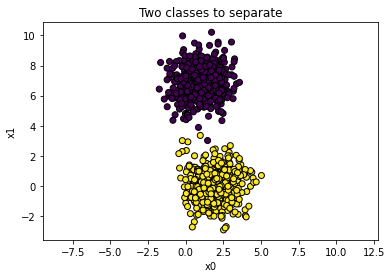

In [4]:
# create x/y train with make blobs
X_train,y_train = make_blobs(n_samples=1000,centers=[(1,7),(2,0)],random_state=myState)
# explore the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, edgecolor='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Two classes to separate')
plt.axis('equal');

Now that the initial setup is complete, the next step would be to create the 3 requied functions for logistic regression. These 3 functions and why they are used are as follows:

- Logistic is used to provide a logistic function.
- Output will use logistic function, along with weights, bias and inputs to calculate the neuron output.
- Error will calculate the error on a single training example.



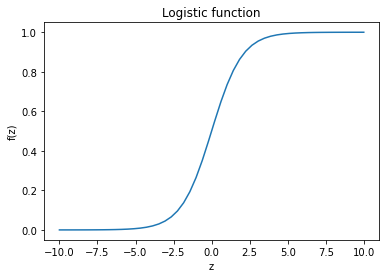

In [5]:
# logistic function
def logistic(z):
    """Calculate logistic function applied to z"""
    return 1/(1 + np.exp(-z))

x = np.linspace(-10,10,endpoint=True)
f = logistic(x)
plt.plot(x,f)
plt.title('Logistic function')
plt.xlabel('z')
plt.ylabel('f(z)');

In [6]:
# output function
def output(w,b,x):
    """Calculate the output of a single logistic neuron with parameters w and b, and input x
       Note: w and x need to have the same number of columns"""
    return logistic(np.matmul(w,x.transpose()) + b)

w = np.array([1,2])
x = np.array([-0.3,0.5])
b = 0.2
print('Expected answer logistic(0.9) =', logistic(0.9))
print('Actual   answer output(w,b,x) =', output(w,b,x))

Expected answer logistic(0.9) = 0.7109495026250039
Actual   answer output(w,b,x) = 0.7109495026250039


By calculating the output with 3 different weights and 3 different inputs (x), above we can see a difference between calculating the expected logistic answer and the actual answer. This could then be used later when calculating the Gradient Descent for the Logistic Regression.

In [7]:
# error function
def error(yhati, yi):
    """Calculate the error on a single example
       Note: yhati and yi need to be both scalars or both vectors of the same length"""
    return -yi*np.log(yhati) - (1-yi)*np.log(1-yhati)

#### 2.1 - Gradient Descent for Logistic Regression
This section will go over a Gradient Descent algorithm for logistic regression, which will look to find the minimum of the logistic regression function.


weight =  [ 1.66021548 -1.53615714] 
 bias =  2.229697683808323


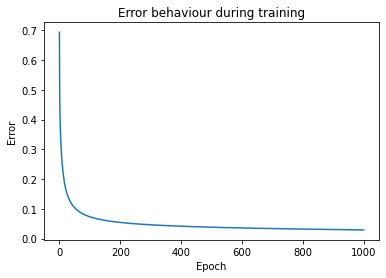

In [8]:
# Gradient Descent 
m, k = X_train.shape
w = np.zeros((k))
b = 0.0 # this can only be set to 0 for 1 neuron
stepsize = 0.1 # 0.1 will be more accurate - but slow
num_epochs = 1000
errorlog = np.zeros((num_epochs))

for i in range(num_epochs):
    E = dz = db = 0 
    dw = np.zeros(w.shape) 
    for xi, yi in zip(X_train,y_train):
        yhati = output(w,b,xi)
        E  += error(yhati,yi)
        dw += (yhati - yi) * xi
        db += (yhati - yi)
    errorlog[i] = E/m
    dw /= m
    db /= m
    w -= stepsize * dw
    b -= stepsize * db
print('weight = ',w,'\n bias = ', b)
plt.plot(errorlog)
plt.title('Error behaviour during training')
plt.xlabel('Epoch')
plt.ylabel('Error');
        
        

This is mainly all we need to set up our GD for LR, the next step would be to look at a confusion matrix to calculate how well the classifier actually performs. 
<br> <br>
This can be done by looking at the performance on a training set and a test set, with the predictions being greater or equal to 0.5 (>= 0.5) this will be classified as 1 and if less than 0.5 (<0.5) classified as 0.

In [9]:
# set y hat train and pred
y_hat_train  = output(w,b,X_train) 
y_train_pred = (y_hat_train >= 0.5).astype(int)
# confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[499,   1],
       [  7, 493]], dtype=int64)

From looking at the confusion matrix, this looks like there were 499 True Positive (TP), 1 False Positive (FP), 7 False Negatives (FN) and 293 True Negatives (TN). 

TP | FP <br>
FN | TN <br>

This would show that this model is well optimized as it is, it would be interesting to see how different this algorithm would be if we were able to normalise the data from (-1 : +1) to (0 : 1).

In [10]:
confusion_matrix(y_train, y_train_pred, normalize='all')
## TODO - PLOT CONFUSION MATRIX

array([[0.499, 0.001],
       [0.007, 0.493]])

*Next* would be to introduce the tanh/tan of the dataset this can easily be done by looking at the module math within python.

In [11]:
print('Return the tangent of x radians:', math.tan(1))
print('Return the hyperbolic tangent of x:', math.tanh(1))

Return the tangent of x radians: 1.5574077246549023
Return the hyperbolic tangent of x: 0.7615941559557649


### Task 3 – MNIST (30%)
Consider the example of the MNIST digits datasets we discussed in class. Try at least 4 different Neural Networks architectures (by changing the number of neurons and the number of layers) and compare their performances using:

- At least two activation functions (sigmoid, relu, ...);
- At least four different step sizes;
- At least three batch sizes;
- At least three optimisation algorithms (remember to use at least three different values for the momentum when using gradient descent);
- At least two parameter initialisations.
<br><br>
Draw appropriate graphs and comment on them to support your conclusions.


#### 3.0 - Initial setup

In [12]:
# Import the dataset
mnist = tf.keras.datasets.mnist
# load dataset on xy
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
def show_image(image, label):
    """Displays a MNIST digit and its label"""
    plt.title('Item {count} is a {lbl}'.format(count=i, lbl=label))
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

Examples of the images in the training data set are:


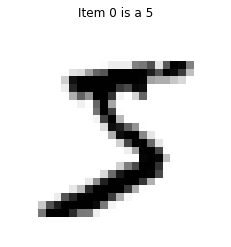

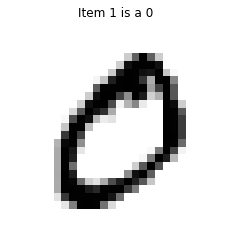

In [14]:
print('Examples of the images in the training data set are:')
for i in range(2):
    show_image(image=x_train[i],label = y_train[i])


Now that the data has been seen and explored (looked at how the data was stored as an array of hex values of a 28x28 pixel grid), the next step would be to import the data with the test train split and then reshaping the input data to get it ready for the ML algorithm.

In [15]:
# convert the data from 0 - 1
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [16]:
# look at the shape of all xy values
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


#### 3.1 - Model 1
The first model will be a basic model which was created by following the documentation for [Tensorflow](https://www.tensorflow.org/tutorials/quickstart/beginner).

In [17]:
def modelOne():
    ## 1 Architecture
    # make a model
    network = tf.keras.models.Sequential() 
    # add a flatten layer
    network.add(tf.keras.layers.Flatten())
    # add first dence layer
    network.add(tf.keras.layers.Dense(128, activation='relu'))
    # add the categories layer (0-9 = 10)
    network.add(tf.keras.layers.Dense(10, activation='softmax'))

    ## 2 Optimizer and Error
    network.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])
    ## 3 Train
    network.fit(x_train, y_train, epochs=3, verbose=0)
    print('Model 1 - Done.')
    print()
    ## 4 Test
    test_loss, test_acc = network.evaluate(x_test, y_test, verbose=0)
    print()
    print("Accuracy on test set =", test_acc)

%time modelOne()

Model 1 - Done.


Accuracy on test set = 0.9684000015258789
Wall time: 3.98 s


Here we can see that there is a slight difference between the test and trained accuracy, with the results being as follows:
- Train 
    - Epoch 1/2 = 0.1038
    - Epoch 2/2 = 0.1027
- Test 
    - Test = 0.0974

This to me looks like using sigmoid and relu as activation layers seems to be working well enough for a high accuracy score. Lets compare these to different types of activations and even different optimizers.

#### 3.2 - Model 2
After going over the model which was created by using the tensorflow documentation, lets move on the a more involved neural network which was covered in class. This model looks to see the effects of different ***step sizes*** within our model.

With these parameters being there for us to manipulate, we can see how big or small of a difference tweaking these paramets can have.


In [18]:
# The effect of different step size
step_sizes = [0.5,0.2,0.1,0.01]
train_errors = {}
# start the loop
for step_size in step_sizes:
    # set numpy seed
    np.random.seed(17076749)
    # set tf seed
    tf.random.set_seed(17076749)
    # 1 - Architecture
    network = tf.keras.models.Sequential() # start the network
    network.add(tf.keras.layers.Flatten()) # flatten layer
    network.add(tf.keras.layers.Dense(128, activation='relu')) # first hidden layer
    network.add(tf.keras.layers.Dense(10, activation='softmax')) # second hidden layer
    opt = tf.keras.optimizers.SGD(step_size)
    network.compile(optimizer=opt, 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])
    history = network.fit(x_train, y_train, epochs=5, verbose=0)
    %time train_errors[step_size] = history.history['loss']
print('Done')

Wall time: 1 ms
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Done


In [19]:
# set up the line styles to use

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_cycler = (cycler(color=colors) +
                  cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']))
plt.rc('axes', prop_cycle=default_cycler)

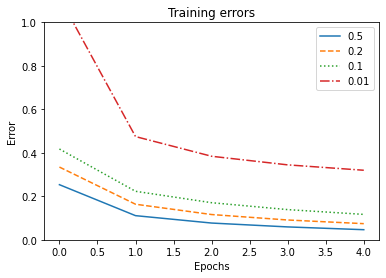

In [20]:
lines = plt.plot(np.array(list(train_errors.values())).transpose())
plt.title('Training errors')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.ylim([0,1])
plt.legend(lines[:], step_sizes, loc='upper right')
# plt.savefig('stepsizes.png')
plt.show();

Model 2 has now been set up and run to go through multiple step sizes whilst using the gradient descent algorithm which will be used to help mind the minimum of this function. This model went through the same model 4 times but was changing the step size each time, these step sizes were as follows:
- 0.5
- 0.2
- 0.1
- 0.01

From looking at the plot above, we can see that 0.5 has the lowest error with the least number of epochs. This would suggest this step size has the highest accuracy score with a low loss score.

Running through the same model multiple times can become quite demanding on pc resources, but within industry it isn't impossible to see that someone could spend a lot of time and resouces trying to get a very optimized model.


#### 3.3 - Model 3
Model 3 will look at exploring 3 different ***batch sizes*** which will be explored to see what effect this could have on our model. There is also a step size which we can assign, and for this we took 0.5 as it was the best performing result from the last model.

In [21]:
# The effect of different batch sizes
batch_sizes = [64,200,32,8,1]
train_errors = {}
times = {}
step_size = 0.5
epochs = 10

# start the loop
for batch_size in batch_sizes:
    # set numpy seed
    np.random.seed(17076749)
    # set tf seed
    tf.random.set_seed(17076749)
    # 1 - Architecture
    network = tf.keras.models.Sequential() # start the network
    network.add(tf.keras.layers.Flatten()) # flatten layer
    network.add(tf.keras.layers.Dense(128, activation='relu')) # first hidden layer
    network.add(tf.keras.layers.Dense(10, activation='softmax')) # second hidden layer
    opt = tf.keras.optimizers.SGD(step_size)
    network.compile(optimizer=opt, 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])
    %time history = network.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=batch_size)
    print('\n',batch_size)
    train_errors[batch_size] = history.history['loss']
print('Done')

Wall time: 5.02 s

 64
Wall time: 3.03 s

 200
Wall time: 8.36 s

 32
Wall time: 27.1 s

 8
Wall time: 3min 19s

 1
Done


To understand the results a bit easier, below there will be a plot.

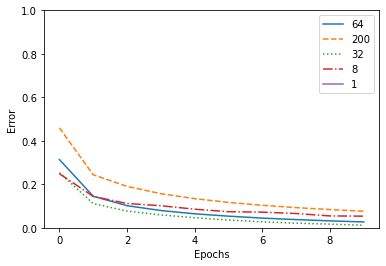

In [22]:
lines = plt.plot(np.array(list(train_errors.values())).transpose())
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.ylim([0,1])
plt.legend(lines[:], batch_sizes, loc='upper right')
#plt.savefig('batchsizes1.png')
plt.show();

When looking at the plot above, which shows the difference in accuracy over the different iterations within the model. From first look at the plot, it looks like a batch size of 32 quickly became the most accuracy model as the 'elbow' is shown at the first iteration (epoch). It looks to be the 3rd fastest compared to the other batch sizes, whilst also keeping a decent accuracy. This looks to me to be the most all rounded within this model, as even though it isn't the fastest model (batch size 200 is), this model has a much better accuracy. As this looks to be the best model so far, the next model will look to take the best parts from the above, and manipulate some other parameters to see how other things can optimize the model.

#### 3.4 - Model 4
This model will look to take the best parts of the above models, whilst changing a few more parameters to see if this model could be optimized even more. Thhis will look at different hidden layers, activation layers and different optimizers. Below was my attempt of looping through all the optimizers but with no luck, so below will be going through a few of them to see if there is even a difference.

In [23]:
## how do the optimizers differ.
#myOpts = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'Optimizer', 'RMSprop', 'SGD'] 
#batch_size = [32]
#train_errors = {}
#times = {}
#step_size = 0.5
#epochs = 10
## set i as 0
#i = 0
## print through them
#for opts in myOpts:
#    # print(myOpts[i])
#    opt = tf.keras.optimizers, myOpts[i]
#    print(opt)
#    i += 1
#    
## start the loop
#for opts in myOpts:
#    # set numpy seed
#    np.random.seed(17076749)
#    # set tf seed
#    tf.random.set_seed(17076749)
#    # 1 - Architecture
#    network = tf.keras.models.Sequential() # start the network
#    network.add(tf.keras.layers.Flatten()) # flatten layer
#    network.add(tf.keras.layers.Dense(128, activation='relu')) # first hidden layer
#    network.add(tf.keras.layers.Dense(10, activation='softmax')) # second hidden layer
#    # change optimizer for each one lists in myOpts
#    # opt = tf.keras.optimizers.SGD(step_size)
#    opt = tf.keras.optimizers.myOpts[i]
#    i += 1
#    # start compiling the network.
#    network.compile(optimizer=opt, 
#                    loss='sparse_categorical_crossentropy', 
#                    metrics=['accuracy'])
#    %time history = network.fit(x_train, y_train, epochs=epochs, verbose=1, batch_size=32)
#    train_errors = history.history['loss']
#    test_loss, test_acc = network.evaluate(x_test, y_test)
#    print("Accuracy on test set =", test_acc)
#    print("Loss on test set =", test_loss)
#print('Done')

In [24]:
# how do the optimizers differ.
batch_size = [32]
train_errors = {}
times = {}
step_size = 0.5
epochs = 10

# Start the NN

# set numpy seed
np.random.seed(17076749)
# set tf seed
tf.random.set_seed(17076749)

# 1 - Architecture
network = tf.keras.models.Sequential() # start the network
network.add(tf.keras.layers.Flatten()) # flatten layer
network.add(tf.keras.layers.Dense(128, activation='relu')) # first hidden layer
network.add(tf.keras.layers.Dense(10, activation='softmax')) # second hidden layer
# change optimizer for each one lists in myOpts
#myOpts = ['Adam', 'Ftrl', 'Nadam', 'SGD'] 
opt = tf.keras.optimizers.SGD(step_size)
# start compiling the network.
network.compile(optimizer=opt, 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
%time history = network.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=32)
train_errors = history.history['loss']
test_loss, test_acc = network.evaluate(x_test, y_test)
print("Accuracy on test set =", test_acc)
print("Loss on test set =", test_loss)
print('Done')

Wall time: 8.35 s
313/313 [==============================] - 0s 391us/step - loss: 0.0802 - accuracy: 0.9768
Accuracy on test set = 0.9768000245094299
Loss on test set = 0.08016550540924072
Done


When running the above model with 4 different models, here we can see the Accuracy and Loss for each set. The 4 optimizers are as follows (with acc and loss):
<br>
- Adam : (0.114, 2.330)
- Ftrl : (0.976, 0.099)
- Nadam : (0.113, 2.333)
- SGD : (0.976, 0.080)

From looking at the different outputs, it looks to me that the gradient descent has the lowest accuracy with Ftrl being close to SGC, with the other 2 optimizers having over 0.1 this would suggest that these have a higher accuracy.
<br> <br>
With this being the case, I would assume that by using either the Adam or nAdam optimizer would give the best results, with this type of model. Especially with the number of steps and batch sizes, which were chosen by going through the above models and seeing which ones seem to be the best optimized within a decent time requirement. 

### 4 - Conclusion

Overall this report has attempted to explore these 3 objectives:
1. Gradient Descent
2. Logistic Regression (as a neural network)
3. MNIST

The first objective proved to be very difficult due to my bad understanding of implementing gradient descent on 4 variables, also my lack of understanding that e isn't a variable but is in fact Exponential! This was where most of my time was spent when first tackling this module and I still don't think i've done it correctly.

The second objective again really confused me, whilst going through the material I understood what we were attempting, but when trying to implement it and report on it, this is where my knowledge let me down. I didn't even know how to implement a tahn activation function for this objective.

The final objective was the easiest to understand for myself, there are still a few things which I'm not understanding. The first is when do you stop with the trial and error to get the best model and secondly is how best to display the best model. 
With plots you can see the accuracy and loss changing over the iterations which is useful, but sometimes it's easier to just get a number as well (see comparing optimizers above). 
Whilst researching the best types of keras models, I came across a third party module called keras-tuner which goes through the trial and error for you, and finds the best model. With my lack of understanding and lack of time, this couldn't be implemented but found some good sources on it. This would be something i'd like to explore more after university.

### References

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2

IBM Cloud Education , 2020. *Gradient Descent* Available at: https://www.ibm.com/cloud/learn/gradient-descent (Accessed 20/03/2021)

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007

Ruder, S., 2016. An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747.

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Sentdex, (2018) *Deep Learning with Python, TensorFlow, and Keras tutorial*  Available at: https://youtu.be/wQ8BIBpya2k (Accessed: 02/04/2021)

Stack Overflow, 2021. *What is the purpose of keras utils normalize?* Available at: https://stackoverflow.com/questions/52571752/what-is-the-purpose-of-keras-utils-normalize (Accessed: 16/04/2021)

Tensorflow, 2021. *TensorFlow 2 quickstart for beginners.* Available at: https://www.tensorflow.org/tutorials/quickstart/beginner (Accessed: 31/05/2021)